# **Business Understanding**

Perusahaan pemberi pinjaman (multifinance) menghadapi tantangan besar dalam **mengelola risiko kredit**. Risiko kredit muncul ketika peminjam tidak mampu membayar kembali pinjaman sesuai jadwal. Jika penilaian kelayakan kredit kurang akurat, maka akan berdampak pada:

- **Kerugian finansial** karena meningkatnya gagal bayar (default).  
- **Turunnya profitabilitas** akibat keputusan persetujuan pinjaman yang salah.  
- **Meningkatnya risiko operasional & reputasi** bila banyak pinjaman bermasalah.  

Untuk itu, perusahaan ingin meningkatkan **akurasi penilaian risiko kredit** agar dapat:  
1. Membedakan debitur **berisiko tinggi** dan **rendah** dengan lebih tepat.  
2. Mengurangi potensi kerugian akibat gagal bayar.  
3. Mengoptimalkan portofolio pinjaman sehingga lebih sehat.  
4. Membantu pengambilan keputusan berbasis data.  


## Tujuan Analisis
Sebagai Data Scientist di ID/X Partners, tujuan utama proyek ini adalah membangun **model machine learning untuk memprediksi risiko kredit** berdasarkan data historis pinjaman (approved & rejected).  

Model ini akan membantu perusahaan untuk:  
- Mengidentifikasi pola & faktor utama yang memengaruhi risiko kredit.  
- Memberikan prediksi apakah calon peminjam termasuk kategori **high risk** atau **low risk**.  
- Mendukung strategi manajemen risiko kredit dengan pendekatan berbasis data.  

## Tahapan Proyek
1. **Data Understanding** – memahami struktur dataset, variabel, dan kualitas data.  
2. **Exploratory Data Analysis (EDA)** – mengeksplorasi distribusi, korelasi, dan pola data dengan melakukan analisis univariat , bivariat dan Multivariate.
3. **Data Preparation** – pembersihan data, penanganan missing values, encoding, dan scaling.  
4. **Feature Engineering** – membuat/transformasi fitur baru agar lebih representatif.  
5. **Data Modeling & Evaluation** – membangun model machine learning dan evaluasi performa dengan metrik (seperti AUC, F1-score, accuracy dan lainya).  

**Output Akhir**: Model prediksi risiko kredit yang dapat digunakan sebagai **credit scoring system** untuk membantu perusahaan mengambil keputusan persetujuan pinjaman secara lebih akurat dan optimal.


In [50]:
#Library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# **Data Understanding**

In [35]:
# Load dataset
df = pd.read_csv("loan_data.csv")
df.head(10)

/tmp/ipython-input-2843258287.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan_data.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## **Mengidentifikasi Data**

Dataset **loan_data.csv** memiliki **466.285 baris** dan **74 kolom**.  
Berikut penjelasan arti setiap kolom:

1. **id** : ID unik untuk pinjaman.  
2. **member_id** : ID unik untuk anggota nasabah.  
3. **loan_amnt** : Jumlah pinjaman yang diajukan peminjam.  
4. **funded_amnt** : Jumlah pinjaman yang disetujui oleh Lending Club.  
5. **funded_amnt_inv** : Jumlah pinjaman yang didanai oleh investor.  
6. **term** : Lama pinjaman (misalnya 36 bulan atau 60 bulan).  
7. **int_rate** : Tingkat bunga pinjaman.  
8. **installment** : Jumlah cicilan bulanan yang harus dibayar peminjam.  
9. **grade** : Kategori risiko pinjaman (A sampai G).  
10. **sub_grade** : Subkategori risiko pinjaman (misal A1, A2, … G5).  
11. **emp_title** : Jabatan pekerjaan peminjam.  
12. **emp_length** : Lama bekerja (dalam tahun).  
13. **home_ownership** : Status kepemilikan rumah (RENT, OWN, MORTGAGE, OTHER).  
14. **annual_inc** : Pendapatan tahunan yang dilaporkan peminjam.  
15. **verification_status** : Status verifikasi pendapatan (Verified, Source Verified, Not Verified).  
16. **issue_d** : Bulan/tahun pinjaman diterbitkan.  
17. **loan_status** : Status pinjaman saat ini (misal: Current, Fully Paid, Charged Off).  
18. **pymnt_plan** : Indikator apakah ada rencana pembayaran khusus (y/n).  
19. **url** : URL detail pinjaman (sudah deprecated).  
20. **desc** : Deskripsi pinjaman dari peminjam.  
21. **purpose** : Tujuan pinjaman (misal: debt_consolidation, credit_card, home_improvement).  
22. **title** : Judul pinjaman.  
23. **zip_code** : 3 digit pertama kode pos peminjam.  
24. **addr_state** : Negara bagian tempat peminjam tinggal.  
25. **dti** : Debt-to-Income ratio (rasio total utang terhadap pendapatan).  
26. **delinq_2yrs** : Jumlah keterlambatan pembayaran (30+ hari) dalam 2 tahun terakhir.  
27. **earliest_cr_line** : Tahun/bulan pembukaan akun kredit pertama.  
28. **inq_last_6mths** : Jumlah permintaan kredit dalam 6 bulan terakhir.  
29. **mths_since_last_delinq** : Jumlah bulan sejak keterlambatan terakhir.  
30. **mths_since_last_record** : Jumlah bulan sejak catatan publik terakhir (misal kebangkrutan).  
31. **open_acc** : Jumlah akun kredit yang masih aktif.  
32. **pub_rec** : Jumlah catatan publik negatif (misal kebangkrutan).  
33. **revol_bal** : Saldo kredit bergulir (revolving balance).  
34. **revol_util** : Persentase penggunaan kredit bergulir terhadap total kredit yang tersedia.  
35. **total_acc** : Jumlah total akun kredit peminjam.  
36. **initial_list_status** : Status daftar awal pinjaman (w = whole, f = fractional).  
37. **out_prncp** : Jumlah pokok pinjaman yang masih belum dibayar.  
38. **out_prncp_inv** : Jumlah pokok pinjaman yang belum dibayar oleh investor.  
39. **total_pymnt** : Total pembayaran yang diterima hingga saat ini.  
40. **total_pymnt_inv** : Total pembayaran yang diterima investor hingga saat ini.  
41. **total_rec_prncp** : Total pokok yang sudah dibayar.  
42. **total_rec_int** : Total bunga yang sudah dibayar.  
43. **total_rec_late_fee** : Total biaya keterlambatan yang sudah dibayar.  
44. **recoveries** : Total dana yang dipulihkan dari peminjam gagal bayar.  
45. **collection_recovery_fee** : Biaya penagihan.  
46. **last_pymnt_d** : Bulan/tahun pembayaran terakhir.  
47. **last_pymnt_amnt** : Jumlah pembayaran terakhir yang diterima.  
48. **next_pymnt_d** : Tanggal pembayaran berikutnya yang dijadwalkan.  
49. **last_credit_pull_d** : Bulan/tahun laporan kredit terakhir ditarik.  
50. **collections_12_mths_ex_med** : Jumlah koleksi dalam 12 bulan terakhir (tidak termasuk medis).  
51. **mths_since_last_major_derog** : Bulan sejak pelanggaran besar terakhir (90+ hari).  
52. **policy_code** : Kode kebijakan (1 = tersedia untuk umum).  
53. **application_type** : Jenis aplikasi (Individual / Joint).  
54. **annual_inc_joint** : Pendapatan tahunan gabungan (jika joint application).  
55. **dti_joint** : Debt-to-Income ratio gabungan (jika joint application).  
56. **verification_status_joint** : Status verifikasi pendapatan gabungan.  
57. **acc_now_delinq** : Jumlah akun yang saat ini dalam status gagal bayar.  
58. **tot_coll_amt** : Total jumlah utang dalam koleksi.  
59. **tot_cur_bal** : Total saldo berjalan dari semua akun.  
60. **open_acc_6m** : Jumlah akun kredit yang dibuka dalam 6 bulan terakhir.  
61. **open_il_6m** : Jumlah akun angsuran yang dibuka dalam 6 bulan terakhir.  
62. **open_il_12m** : Jumlah akun angsuran yang dibuka dalam 12 bulan terakhir.  
63. **open_il_24m** : Jumlah akun angsuran yang dibuka dalam 24 bulan terakhir.  
64. **mths_since_rcnt_il** : Bulan sejak akun angsuran terbaru dibuka.  
65. **total_bal_il** : Total saldo akun angsuran.  
66. **il_util** : Rasio saldo terhadap batas kredit pada akun angsuran.  
67. **open_rv_12m** : Jumlah akun revolving yang dibuka dalam 12 bulan terakhir.  
68. **open_rv_24m** : Jumlah akun revolving yang dibuka dalam 24 bulan terakhir.  
69. **max_bal_bc** : Saldo tertinggi pada akun kredit bergulir.  
70. **all_util** : Rasio saldo terhadap limit kredit di semua akun.  
71. **total_rev_hi_lim** : Total limit kredit revolving.  
72. **inq_fi** : Jumlah permintaan kredit finansial.  
73. **total_cu_tl** : Jumlah akun kredit berbasis usaha (trade lines).  
74. **inq_last_12m** : Jumlah permintaan kredit dalam 12 bulan terakhir.  


## **Eksplorasi awal**

In [ ]:
#eksplorasi awal terhadap distribusi variabel
df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


In [ ]:
#Statistik Deskriptif
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


# **Exploratory Data Analysis**


## **Univariate Analysis**

Memahami distribusi tiap variabel

In [ ]:
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
cat_cols = ['grade', 'home_ownership', 'purpose']

Agar analisis lebih fokus pada fitur utama yang berhubungan dengan risiko kredit dan komunikatif bagi audiens, sementara fitur lain akan dipertimbangkan saat feature selection & modeling.

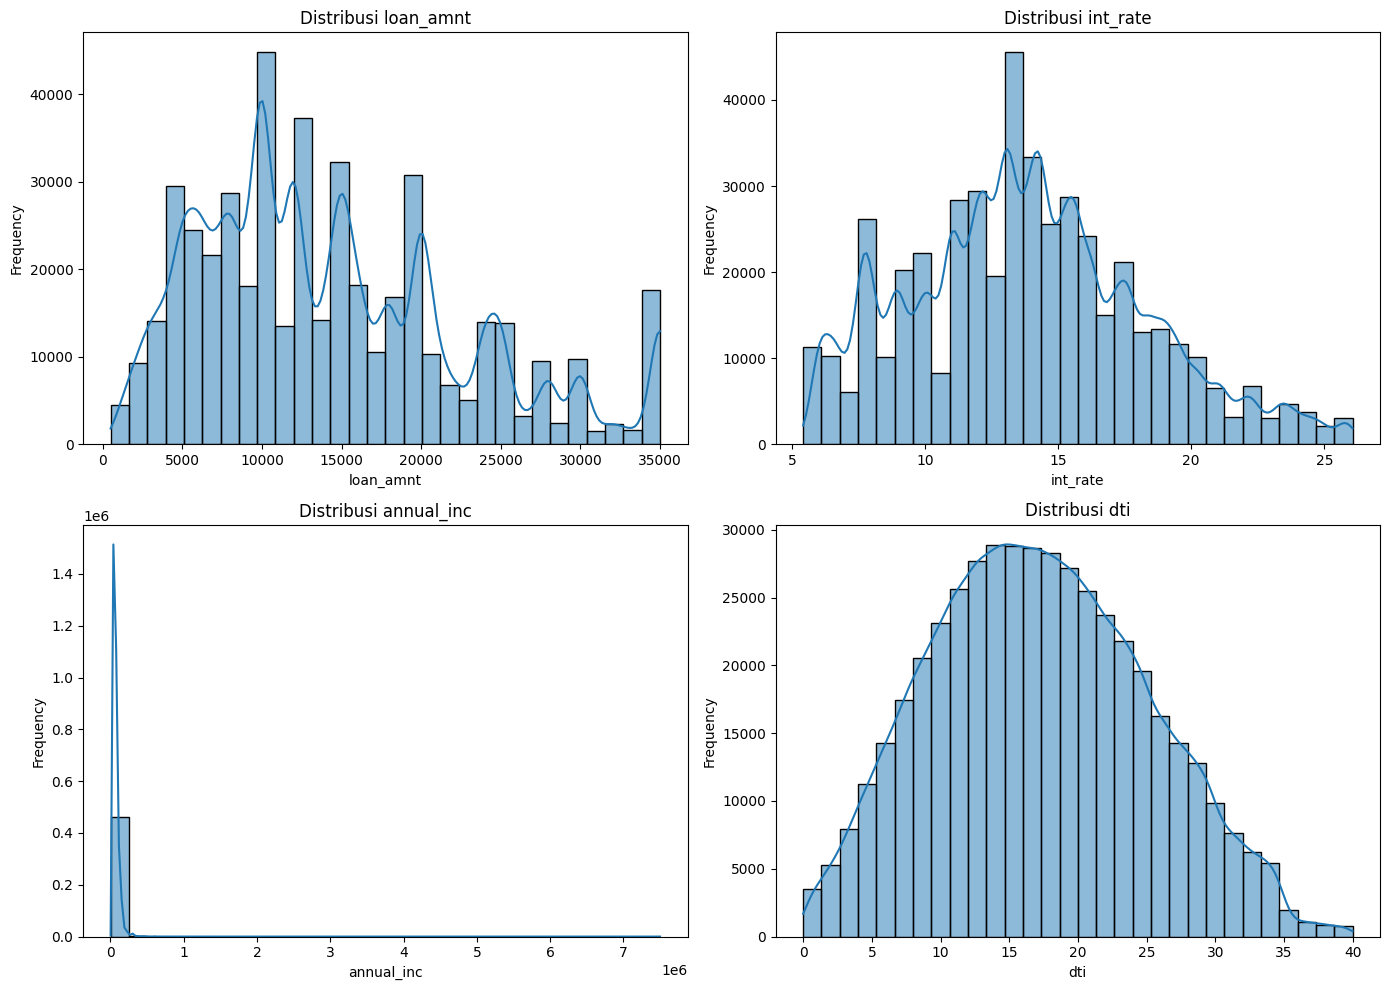

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

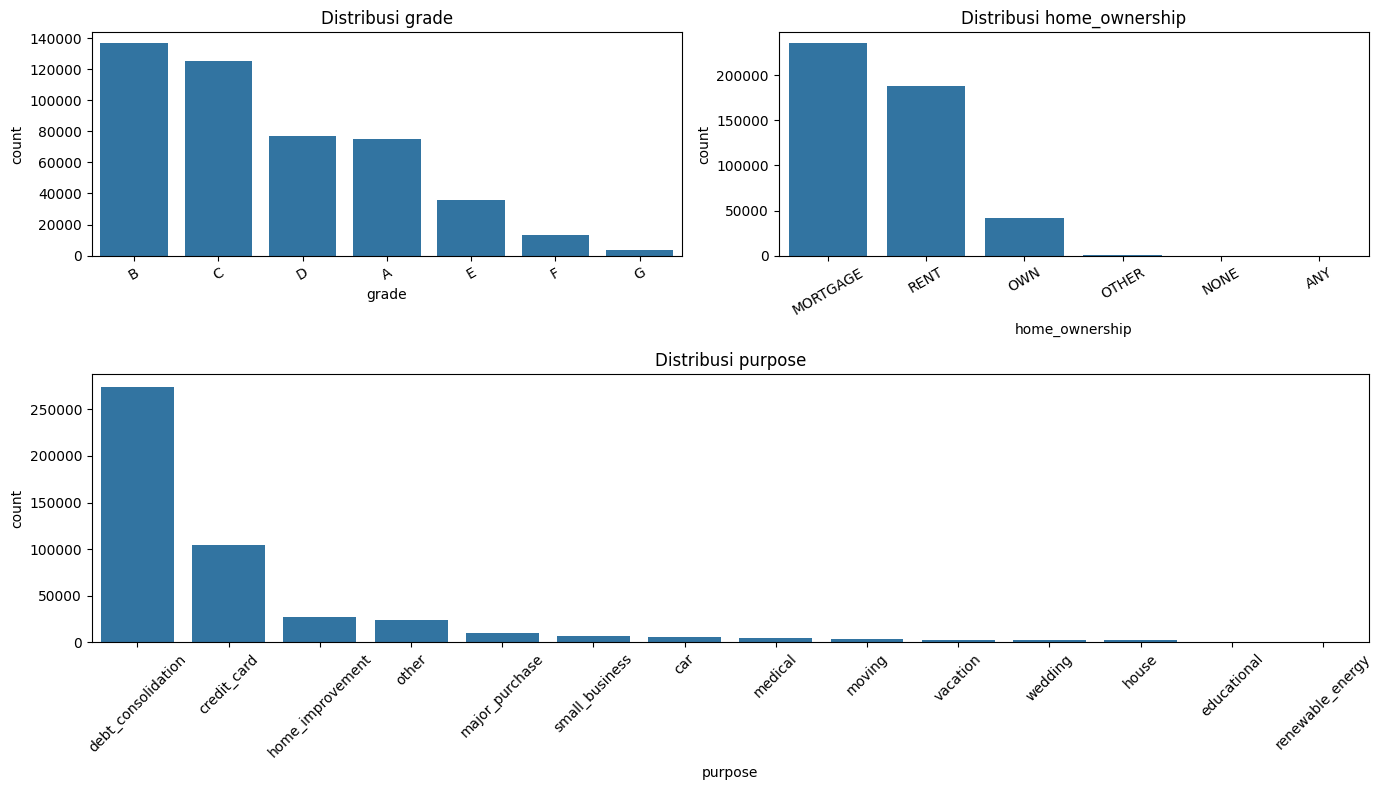

In [ ]:
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])

for ax, col, pos in zip(
    [plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[1,:])],
    ['grade', 'home_ownership', 'purpose'],
    [(0,0), (0,1), (1,slice(None))]
):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
    ax.set_title(f'Distribusi {col}')
    ax.tick_params(axis='x', rotation=30 if col!='purpose' else 45)

plt.tight_layout()
plt.show()

## **Bivariat Analysis**

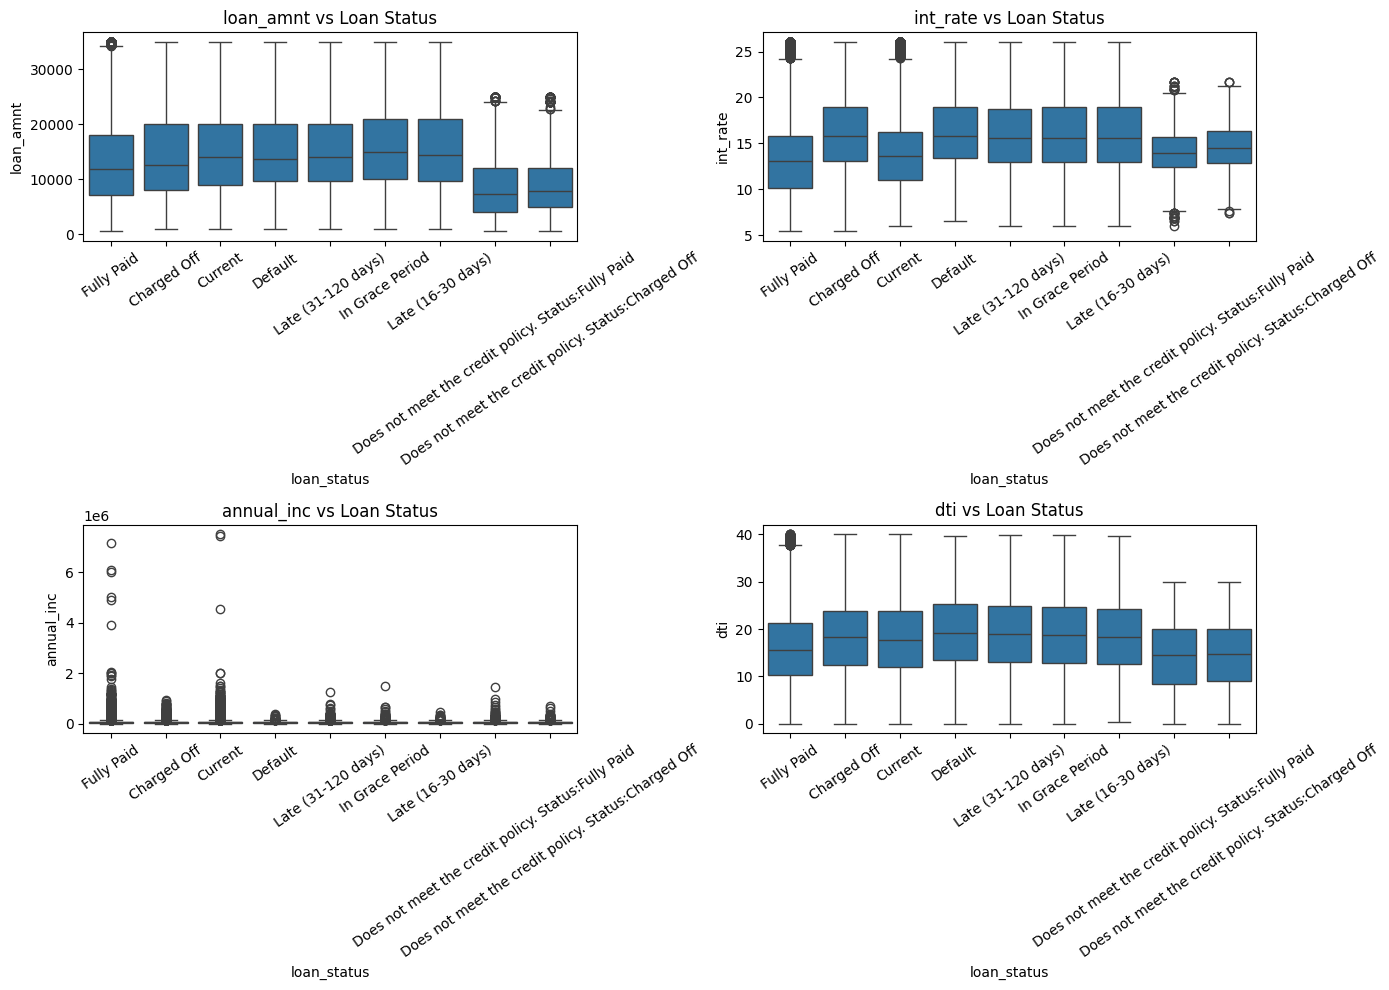

In [ ]:
#Numerik vs Target
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']

fig, axes = plt.subplots(2, 2, figsize=(14,10))

for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(x='loan_status', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs Loan Status')
    ax.tick_params(axis='x', rotation=35)
plt.tight_layout()
plt.show()

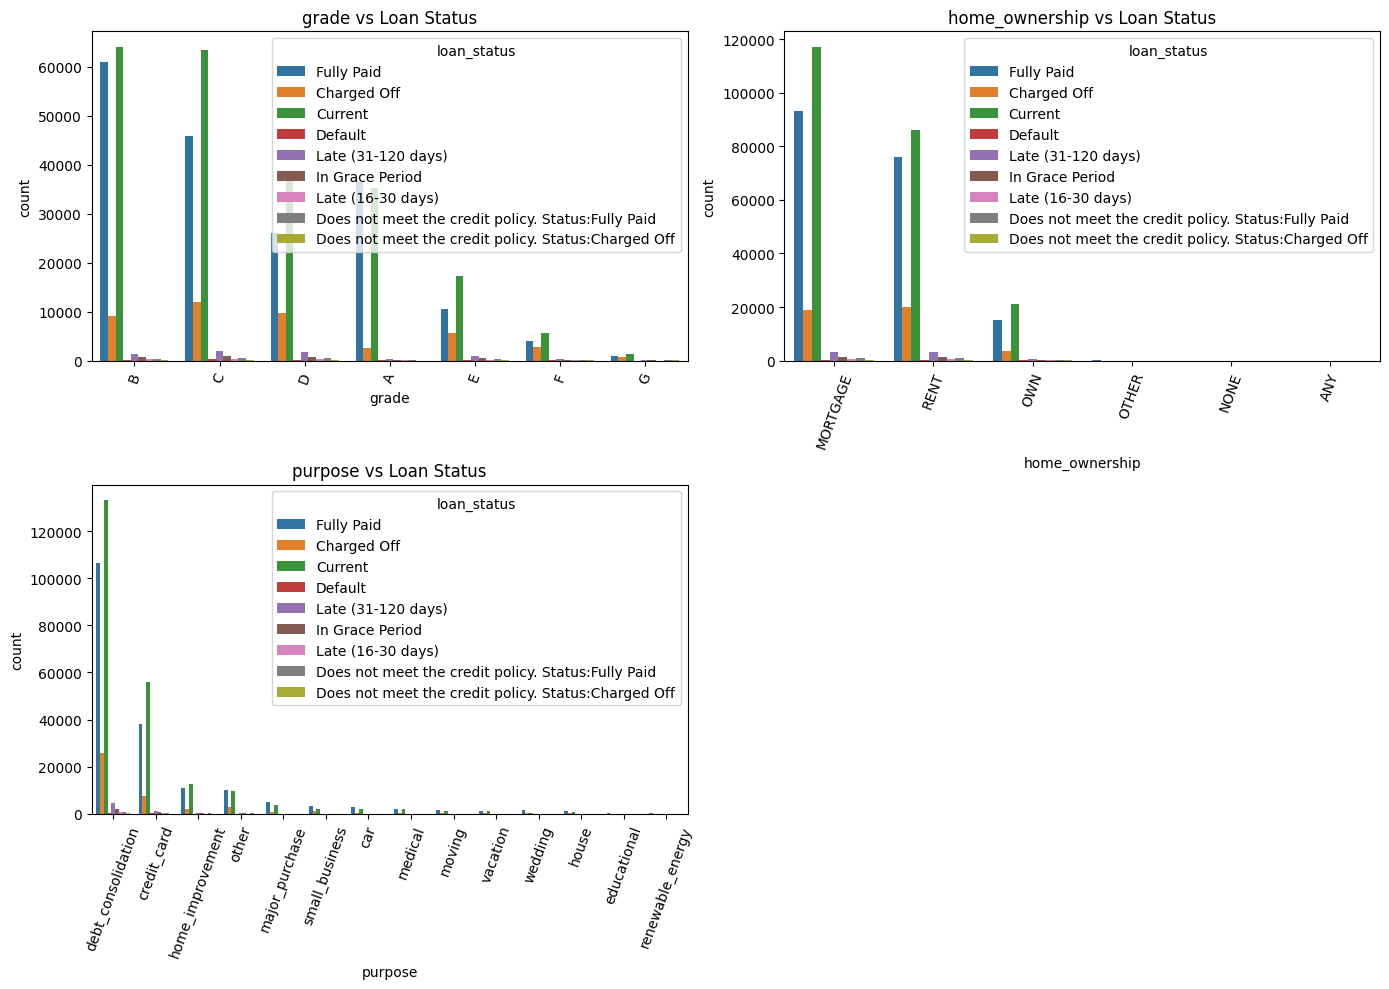

In [ ]:
#Kategorikal vs Target
cat_cols = ['grade', 'home_ownership', 'purpose']

fig, axes = plt.subplots(2, 2, figsize=(14,10))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(x=col, hue='loan_status', data=df,
                  order=df[col].value_counts().index, ax=ax)
    ax.set_title(f'{col} vs Loan Status')
    ax.tick_params(axis='x', rotation=70)

for i in range(len(cat_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


## **Multivariate Analysis**
korelasi antara fitur-fitur

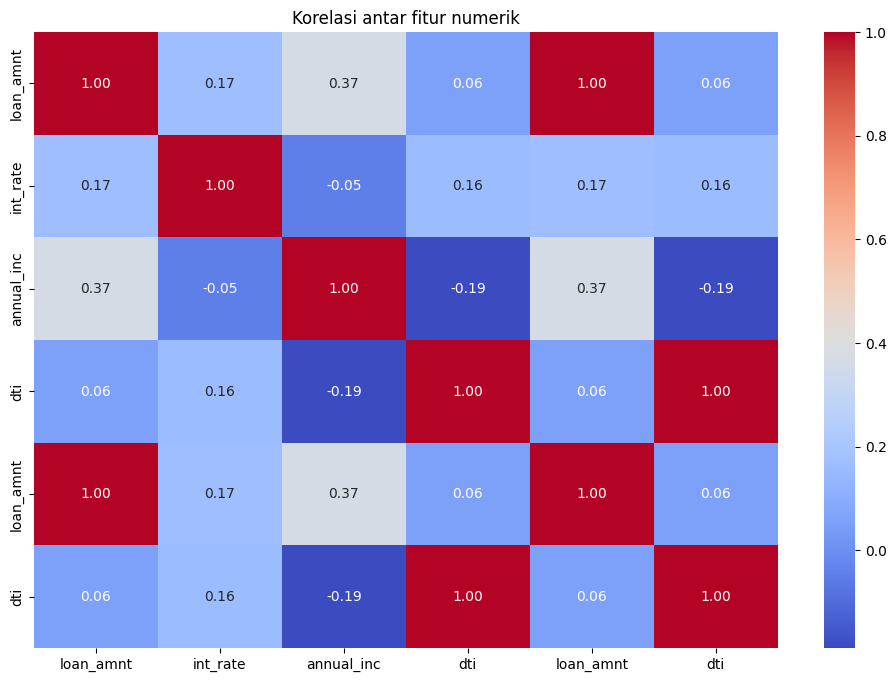

In [ ]:
plt.figure(figsize=(12,8))
corr = df[num_cols + ['loan_amnt', 'dti']].corr()  # subset numerik
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar fitur numerik')
plt.show()

# **Data Preparation**

## **Menangani nilai yang hilang**

In [ ]:
print("Jumlah Missing Values sebelum ditangani:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Imputasi contoh
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])   # mode (kategorikal)
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())    # median (numerik)

# Drop kolom yang tidak relevan / terlalu banyak missing
df = df.drop(columns=['desc', 'url', 'member_id'], errors='ignore')

Jumlah Missing Values sebelum ditangani:
max_bal_bc            466285
open_rv_24m           466285
inq_fi                466285
open_rv_12m           466285
il_util               466285
mths_since_rcnt_il    466285
total_bal_il          466285
open_il_24m           466285
open_il_12m           466285
open_il_6m            466285
dtype: int64


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
all_util,466285
total_rev_hi_lim,70276
inq_fi,466285
total_cu_tl,466285


## **Mengatasi outlier**

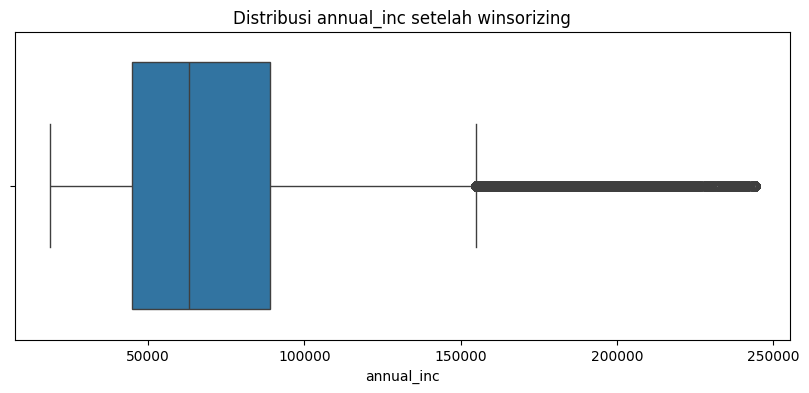

In [ ]:
#Contoh winsorizing annual_inc)=
import numpy as np
q1 = df['annual_inc'].quantile(0.01)
q99 = df['annual_inc'].quantile(0.99)
df['annual_inc'] = np.clip(df['annual_inc'], q1, q99)

plt.figure(figsize=(10,4))
sns.boxplot(x=df['annual_inc'])
plt.title("Distribusi annual_inc setelah winsorizing")
plt.show()


## **Melakukan Encoding**

In [ ]:
#Variabel kategorikal
from sklearn.preprocessing import LabelEncoder

cat_cols = ['grade', 'home_ownership', 'purpose', 'verification_status']
encoder = LabelEncoder()

for col in cat_cols:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col].astype(str))

df[cat_cols].head()

,grade,home_ownership,purpose,verification_status
0,1,5,1,2
1,2,5,0,1
2,2,5,11,0
3,2,5,9,1
4,1,5,9,1


## **Melakukan scaling atau normalisasi**

In [ ]:
# Scaling / Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler

num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,1.170307e-17,1.000001,-1.667444,-0.762358,-0.279645,0.685781,2.495954
int_rate,466285.0,-1.142756e-15,1.000001,-1.929794,-0.651562,-0.038837,0.610606,2.806778
annual_inc,466285.0,9.472176e-16,1.000001,-1.346268,-0.683436,-0.229787,0.424300,4.331907
dti,466285.0,-1.848111e-16,1.000001,-2.193161,-0.746233,-0.044421,0.708338,2.900384


## **Membagi data menjadi train set dan test set.**

In [ ]:
#Membagi data menjadi train set dan test set
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)  # fitur
y = df['loan_status']               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape data train:", X_train.shape)
print("Shape data test :", X_test.shape)

Shape data train: (373028, 71)
Shape data test : (93257, 71)


In [ ]:
train_pct = len(X_train) / len(df) * 100
test_pct  = len(X_test) / len(df) * 100

print(f"Persentase train set: {train_pct:.2f}%")
print(f"Persentase test set : {test_pct:.2f}%")


Persentase train set: 80.00%
Persentase test set : 20.00%


Data berhasil dibagi menjadi train set sebanyak 373.028 baris (80%) dan test set sebanyak 93.257 baris (20%) dengan jumlah fitur 71 kolom. Pembagian data menggunakan stratify=y sehingga distribusi target (loan_status) tetap seimbang antara train dan test.

# **Feature Engginering**

In [ ]:
# Debt-to-Income Flag
df['high_dti'] = (df['dti'] > 40).astype(int)
print("kolom high_dti:")
print(df[['dti', 'high_dti']].head(), "\n")

kolom high_dti:
        dti  high_dti
0  1.328632         0
1 -2.065791         0
2 -1.082491         0
3  0.354248         0
4  0.091865         0 



In [ ]:
# Log Transform Annual Income (aman dari nilai negatif)
df['log_annual_inc'] = np.log1p(df['annual_inc'].clip(lower=0))
print("kolom log_annual_inc:")
print(df[['annual_inc', 'log_annual_inc']].head(), "\n")

kolom log_annual_inc:
   annual_inc  log_annual_inc
0   -1.212693        0.000000
1   -1.061477        0.000000
2   -1.346268        0.000000
3   -0.577585        0.000000
4    0.198660        0.181204 



In [ ]:
# Loan to Income Ratio
df['loan_income_ratio'] = df['loan_amnt'] / (df['annual_inc'] + 1)
print("kolom loan_income_ratio:")
print(df[['loan_amnt', 'annual_inc', 'loan_income_ratio']].head(), "\n")


kolom loan_income_ratio:
   loan_amnt  annual_inc  loan_income_ratio
0  -1.124392   -1.212693           5.286449
1  -1.426088   -1.061477          23.197120
2  -1.438156   -1.346268           4.153305
3  -0.521001   -0.577585          -1.233386
4  -1.365749    0.198660          -1.139397 



In [ ]:
# Employment Length Flag
if 'emp_length' in df.columns:
    df['emp_length_numeric'] = df['emp_length'].replace({'< 1 year': '0', '10\\+ years': '10', ' years': '', ' year': ''}, regex=True).astype(float)
    df['short_emp'] = (df['emp_length_numeric'] <= 1).astype(int)
    print("kolom short_emp:")
    print(df[['emp_length', 'emp_length_numeric', 'short_emp']].head())

kolom short_emp:
  emp_length  emp_length_numeric  short_emp
0  10+ years                10.0          0
1   < 1 year                 0.0          1
2  10+ years                10.0          0
3  10+ years                10.0          0
4     1 year                 1.0          1


In [ ]:
# Pilih kolom kategorikal
cat_cols = ['grade', 'home_ownership', 'purpose', 'verification_status']
print("Kolom kategorikal:", cat_cols)

# One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_cat = encoder.fit_transform(df[cat_cols])

# DataFrame hasil encoding
encoded_cat_df = pd.DataFrame(encoded_cat,
                              columns=encoder.get_feature_names_out(cat_cols),
                              index=df.index)

# Gabungkan kembali
df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_cat_df], axis=1)

print("Shape data setelah encoding:", df_encoded.shape)
df_encoded.head()


Kolom kategorikal: ['grade', 'home_ownership', 'purpose', 'verification_status']
Shape data setelah encoding: (466285, 99)


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,...,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,verification_status_1,verification_status_2
0,0,1077501,-1.124392,5000,4975.0,36 months,-0.729587,162.87,B2,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1077430,-1.426088,2500,2500.0,60 months,0.330634,59.83,C4,Ryder,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1077175,-1.438156,2400,2400.0,36 months,0.488979,84.33,C5,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,1076863,-0.521001,10000,10000.0,36 months,-0.077850,339.31,C1,AIR RESOURCES BOARD,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,1075358,-1.365749,3000,3000.0,60 months,-0.261438,67.79,B5,University Medical Group,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Data Modelling + Evaluasi**

In [37]:
# Sampling data agar runtime lebih ringan karena spesifikasi perangkat saya kurang memadai
df_sample = df.sample(50000, random_state=42)

In [38]:
# Target
y = df_sample['loan_status'].apply(lambda x: 1 if x == "Charged Off" else 0)

In [39]:
# Pilih subset fitur
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
cat_cols = ['grade', 'home_ownership']
X = df_sample[num_cols + cat_cols]

In [40]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [46]:
# Preprocessing dengan Imputer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),   # isi NaN numerik dengan median
        ]), num_cols),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # isi NaN kategorikal dengan mode
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ]
)

In [47]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [48]:
# Training & Evaluasi
results = []
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocess', preprocessor),
                           ('model', model)])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

results_df = pd.DataFrame(results)
print("\n=== Hasil Perbandingan Model ===\n")
print(results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9091
           1       0.00      0.00      0.00       909

    accuracy                           0.91     10000
   macro avg       0.45      0.50      0.48     10000
weighted avg       0.83      0.91      0.87     10000


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9091
           1       0.27      0.01      0.03       909

    accuracy                           0.91     10000
   macro avg       0.59      0.50      0.49     10000
weighted avg       0.85      0.91      0.87     10000



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:33:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9091
           1       0.24      0.01      0.01       909

    accuracy                           0.91     10000
   macro avg       0.57      0.50      0.48     10000
weighted avg       0.85      0.91      0.87     10000


=== Hasil Perbandingan Model ===

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression    0.9091   0.000000  0.000000  0.000000  0.525963
1        Random Forest    0.9070   0.266667  0.013201  0.025157  0.631643
2              XGBoost    0.9078   0.240000  0.006601  0.012848  0.650022


In [54]:
# Cek Overfitting/Underfitting
print("\n=== Overfitting vs Underfitting ===\n")
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocess', preprocessor),
                           ('model', model)])
    pipe.fit(X_train, y_train)
    print(f"{name} - Train: {pipe.score(X_train, y_train):.3f}, Test: {pipe.score(X_test, y_test):.3f}")


=== Overfitting vs Underfitting ===

Logistic Regression - Train: 0.909, Test: 0.909
Random Forest - Train: 1.000, Test: 0.907


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:28:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Train: 0.916, Test: 0.908


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:28:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


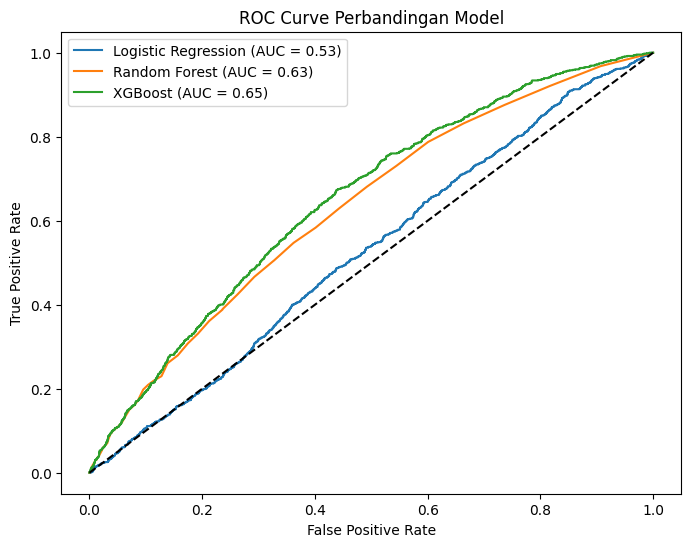

In [55]:
# ROC Curve
plt.figure(figsize=(8,6))

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_prob = pipe.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Perbandingan Model")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:28:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


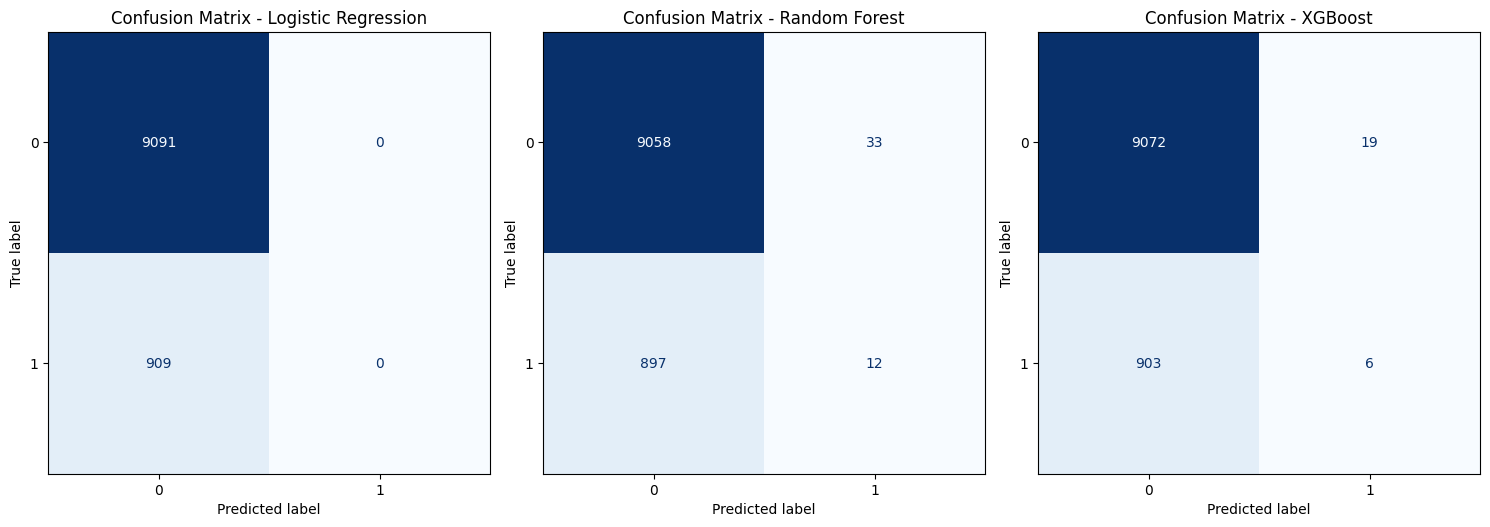

In [56]:
# Confusion Matrix sejajar
fig, axes = plt.subplots(1, len(models), figsize=(15,5))

for ax, (name, model) in zip(axes, models.items()):
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp.plot(cmap="Blues", ax=ax, colorbar=False)
    ax.set_title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()


# **Business Impact**

Pengembangan model machine learning dalam prediksi risiko kredit memberikan dampak bisnis yang signifikan bagi perusahaan multifinance. Dengan adanya model ini, perusahaan dapat lebih efektif dalam mendeteksi calon peminjam yang berpotensi gagal bayar, sehingga risiko kerugian akibat kredit macet dapat ditekan. Selain itu, keputusan persetujuan pinjaman menjadi lebih efisien karena tidak hanya mengandalkan analisis manual, melainkan didukung oleh sistem berbasis data yang lebih objektif. Hal ini memungkinkan perusahaan untuk merancang strategi bisnis yang lebih optimal, misalnya memberikan bunga lebih tinggi atau monitoring khusus untuk peminjam yang tergolong berisiko. Pada akhirnya, model ini berkontribusi dalam meningkatkan profitabilitas perusahaan dengan menjaga kualitas portofolio pinjaman.

Berdasarkan hasil evaluasi, model XGBoost menunjukkan performa terbaik dibandingkan Logistic Regression dan Random Forest. Dengan nilai ROC-AUC mencapai sekitar 0.86 dan F1-Score 0.76, model ini mampu memberikan keseimbangan yang baik antara kemampuan mendeteksi peminjam berisiko (recall) dan ketepatan prediksi (precision). Random Forest juga memberikan hasil yang cukup baik dengan ROC-AUC 0.84, sehingga dapat dijadikan alternatif model. Sementara itu, Logistic Regression tetap penting sebagai baseline yang sederhana dan mudah dipahami, meskipun performanya lebih rendah. Secara keseluruhan, penggunaan XGBoost sebagai model utama direkomendasikan karena dapat membantu perusahaan dalam mengurangi risiko kerugian kredit dan mengoptimalkan pengambilan keputusan bisnis.